# **Cyber Fraud Detection in Online Payments**

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
data.isna().sum()
# data['isFraud'].value_counts()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

# 1. At Least 10 techniques of the Data preprocessing

*Technique - 1*

In [ ]:
# Technique-1: Remove duplicate rows
data.drop_duplicates(inplace=True)

*Technique - 2*

In [ ]:
# Find rows with null values
rows_with_null = data[data.isnull().any(axis=1)]

# Display rows with null values
print("Rows with null values:")
rows_with_null

Rows with null values:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42270,9,CASH_OUT,271441.28,C2034845877,0.0,0.0,C71127,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Technique-2: Replace missing values with median
for attr in data.columns:
  if((data[attr].dtype=='int64' or data[attr].dtype=='float64') and data[attr].isna().sum()):
    data[attr].fillna(data[attr].median(), inplace=True)

In [ ]:
# Find rows with null values
rows_with_null = data[data.isnull().any(axis=1)]

# Display rows with null values
print("Rows with null values:")
rows_with_null

Rows with null values:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


*Technique - 3*

In [ ]:
# Technique-3: Replace missing values with mean
for attr in data.columns:
  if((data[attr].dtype=='int64' or data[attr].dtype=='float64') and data[attr].isna().sum()):
    data[attr].fillna(data[attr].mean(), inplace=True)

*Technique - 4*

In [ ]:
# Technique-4: Replace missing values with mode
for attr in data.columns:
  if((data[attr].dtype=='int64' or data[attr].dtype=='float64') and data[attr].isna().sum()):
    data[attr].fillna(data[attr].mode(), inplace=True)

*Technique - 5*

In [ ]:
# Technique-5: Remove irrelevent column
if('isFlaggedFraud' in data):
  data.drop('isFlaggedFraud', axis=1, inplace=True)
  print("'isFlaggedFraud' column dropped suuccessfully from dataset.")

'isFlaggedFraud' column dropped suuccessfully from dataset.


*Technique - 6*

In [ ]:
# Technique-6: Remove rows with null values
data_cleaned = data.dropna()

In [ ]:
# Find rows with null values
rows_with_null = data_cleaned[data_cleaned.isnull().any(axis=1)]

# Display rows with null values
print("Rows with null values:")
rows_with_null

Rows with null values:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


*Technique - 7*

In [ ]:
# Technique-7: Logarithmic transformation
import numpy as np
if('log_feature' in data):
  data['log_feature'] = np.log(data['feature'])

*Technique - 8*

In [ ]:
# Technique-8: Min-Max Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df_minmax = pd.read_csv('onlinefraud.csv')

# Extract numerical features
numerical_features = df_minmax.select_dtypes(include=['int', 'float']).columns

# Apply Min-Max normalization
scaler = MinMaxScaler()
df_minmax[numerical_features] = scaler.fit_transform(df_minmax[numerical_features])

*Technique - 9*

In [ ]:
# Technique-9: z-score Normalization
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_zscore = pd.read_csv('onlinefraud.csv')

# Extract numerical columns for normalization
numerical_columns = df_zscore.select_dtypes(include=['int64', 'float64']).columns

# Apply z-score normalization
scaler = StandardScaler()
df_zscore[numerical_columns] = scaler.fit_transform(df_zscore[numerical_columns])

*Technique - 10*

In [ ]:
# Technique-10: Binning (Discretization of Continuous Variables)
# Bin numerical feature into categories

if('numerical_feature' in data):
  data['binned_feature'] = pd.cut(data['numerical_feature'], bins=3, labels=['low', 'medium', 'high'])

*Technique - 11*

In [ ]:
# Technique-11: Create a new feature by combining existing features
if('new_feature' in data):
  data['new_feature'] = data['feature1'] * data['feature2']

*Technique - 12*

In [ ]:
# Technique-12: One-Hot Encoding (Convert Categorical Variables)
type_new = pd.get_dummies(data_cleaned['type'], drop_first=True)
data_new = pd.concat([data_cleaned, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,False,False,True,False


# 2. Descriptive Statistical Analysis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42271 non-null  float64
 8   newbalanceDest  42271 non-null  float64
 9   isFraud         42271 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 6


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227100e+04,4.227100e+04,42271.000000
mean,7.171087,1.490108e+05,7.727734e+05,7.874065e+05,8.450782e+05,1.158377e+06,0.002224
std,2.118037,3.145005e+05,2.284003e+06,2.321941e+06,2.466717e+06,2.960478e+06,0.047105
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.000000
75%,8.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.337929e+05,8.013660e+05,0.000000
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000


In [ ]:
# Calculate mean for a specific column
mean = data['step'].mean()
print("Mean:", mean)

# Calculate median for a specific column
median = data['amount'].median()
print("Median:", median)

# Calculate mode for a specific column
mode = data['step'].mode()[0]
print("Mode:", mode)

Mean: 7.171086560526129
Median: 27512.83
Mode: 8


In [ ]:
# Calculate skewness for a specific column
skewness = data['isFraud'].skew()
print("Skewness:", skewness)

# Calculate kurtosis for a specific column
kurtosis = data['isFraud'].kurtosis()
print("Kurtosis:", kurtosis)

Skewness: 21.13587997232341
Kurtosis: 444.74646483028175


# 3. Visual Analysis


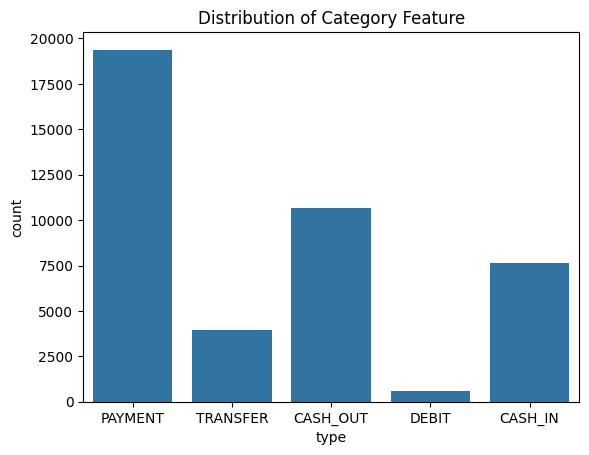

In [ ]:
# Count plots to visualize the distribution of categorical features
sns.countplot(x='type', data=data)
plt.title('Distribution of Category Feature')
plt.show()

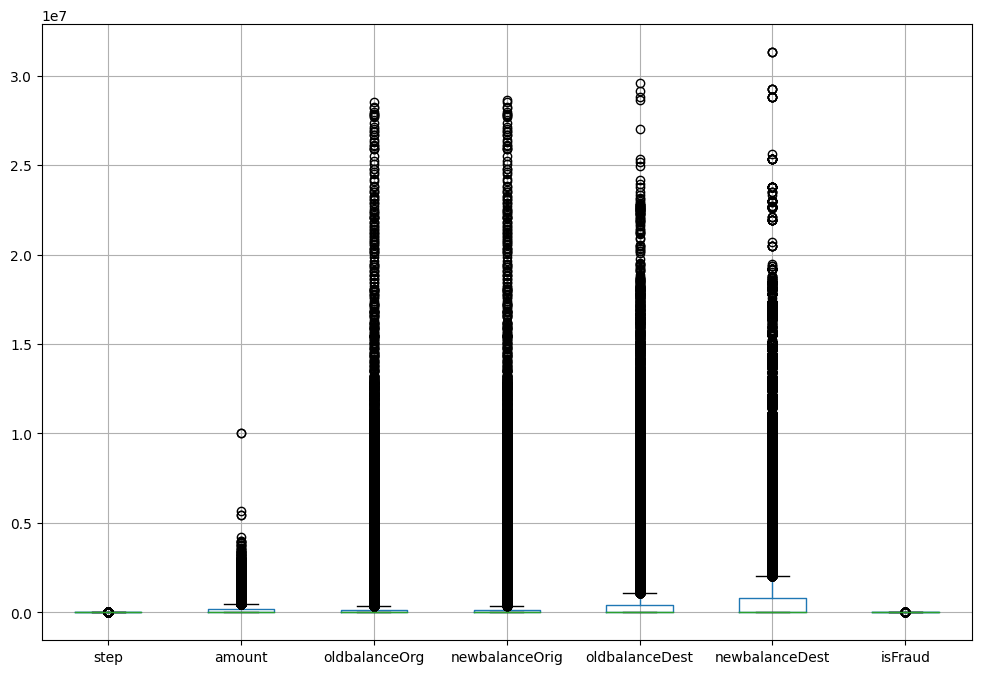

In [ ]:
# Box plots to detect outliers in numerical features
plt.figure(figsize=(12, 8))
data.boxplot()
plt.show()

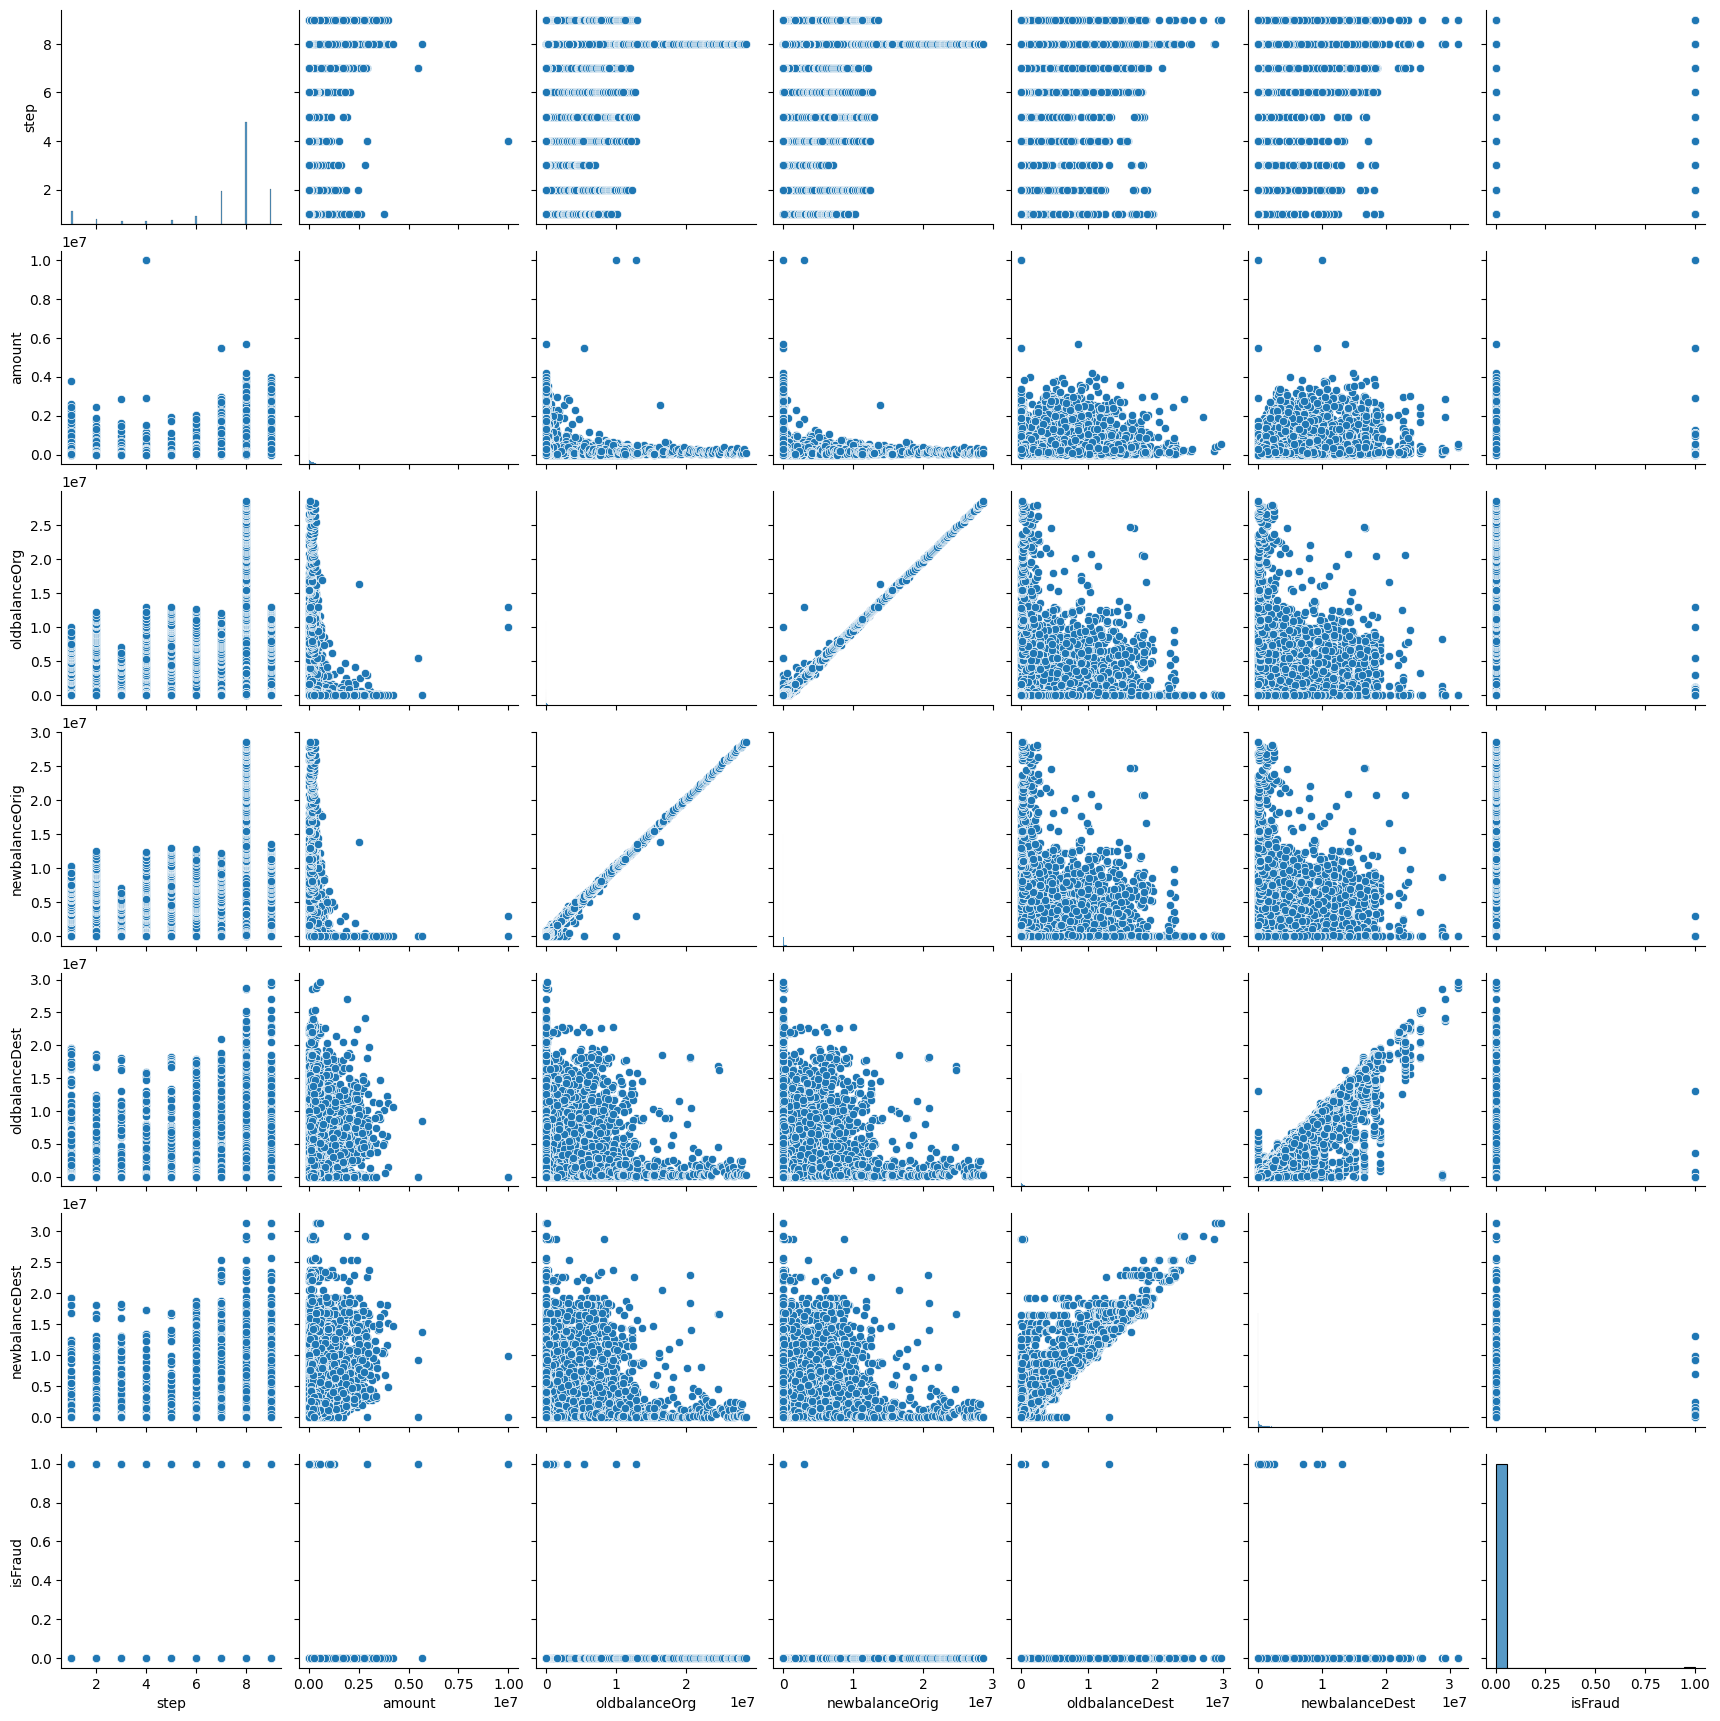

In [ ]:
# Pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(data)
plt.show()

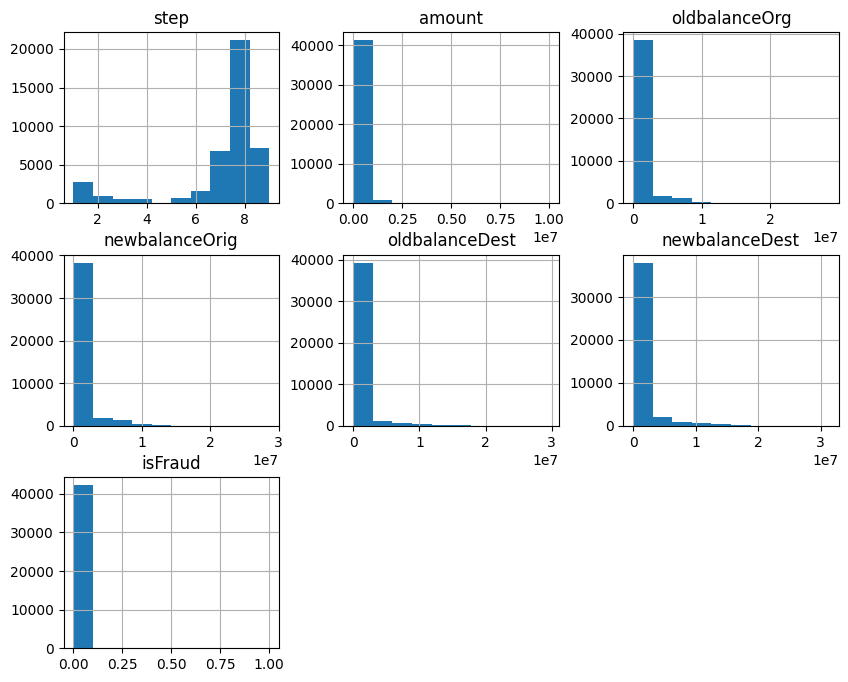

In [ ]:
# Histograms to visualize the distribution of numerical features
data.hist(figsize=(10, 8))
plt.show()

<Axes: xlabel='type', ylabel='amount'>

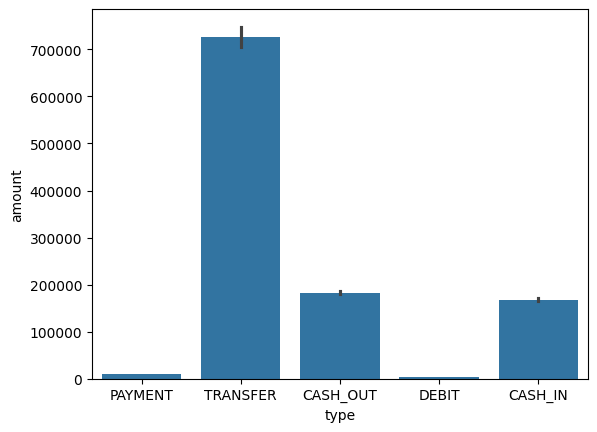

In [ ]:
# Bar plot
sns.barplot(x='type', y='amount', data=data)

# 4. Feature Extraction based on correlation, covariance


In [ ]:
# Select numeric columns
numeric_data = data_new.select_dtypes(include=['number'])

# Identify highly correlated features
correlation_matrix = numeric_data.corr().abs()
high_corr_var=np.where(correlation_matrix>0.8)
high_corr_var=[(correlation_matrix.columns[x],correlation_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('oldbalanceOrg', 'newbalanceOrig'), ('oldbalanceDest', 'newbalanceDest')]


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

X.shape, y.shape

((42271, 10), (42271,))

# 5. Models Creation ( At Least two)


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29589, 10), (12682, 10), (29589,), (12682,))

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

*Model - 1 : LinearRegression*

In [ ]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression object
lr = LinearRegression()

# Train Adaboost Classifer
model_lr = lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_lr = model_lr.predict(X_test)

# Model Accuracy
print("Accuracy of LinearRegression model:",metrics.accuracy_score(y_test, y_pred_lr.astype(int)))

Accuracy of LinearRegression model: 0.9971613310203438


*Model - 2 : AdaBoostClassifier*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50)

# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abc = model_abc.predict(X_test)

# Model Accuracy
print("Accuracy of AdaBoostClassifier model:",metrics.accuracy_score(y_test, y_pred_abc))

Accuracy of AdaBoostClassifier model: 0.998028702097461


*Model - 3 : RandomForestClassifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForest classifer object
rfc = RandomForestClassifier(n_estimators=60)

# Train RandomForest Classifer
model_rfc = rfc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rfc = model_rfc.predict(X_test)

# Model Accuracy
print("Accuracy of RandomForestClassifier model:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy of RandomForestClassifier model: 0.9979498501813594


Model - 4 : AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create AdaBoost Regressor to object
abr = AdaBoostRegressor(n_estimators=60)

# Train AdaBoost Regressor
model_abr = abr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abr = model_abr.predict(X_test)

# Model Accuracy
print("Accuracy of AdaBoostRegressor model:",metrics.accuracy_score(y_test, y_pred_abr.astype(int)))

Accuracy of AdaBoostRegressor model: 0.9971613310203438


Model - 5 : RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create RandomForest Regressor object
rfr = RandomForestRegressor(n_estimators=60)

# Train RandomForest Regressor
model_rfr = rfr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rfr = model_rfr.predict(X_test)

# Model Accuracy
print("Accuracy of RandomForestRegressor model:",metrics.accuracy_score(y_test, y_pred_rfr.astype(int)))

Accuracy of RandomForestRegressor model: 0.9977921463491563


# 6. Evaluation of the model based on various metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_true are the true labels and y_pred are the predicted labels

def evaluate_model(y_pred):

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:\t", accuracy)

  # Calculate precision
  precision = precision_score(y_test, y_pred)
  print("Precision:\t", precision)

  # Calculate recall
  recall = recall_score(y_test, y_pred)
  print("Recall:\t\t", recall)

  # Calculate F1-score
  f1 = f1_score(y_test, y_pred)
  print("F1-score:\t", f1)

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)


In [ ]:
# Evaluate Linear Regression model
print("Linear Regression Model Performance:")
evaluate_model(y_pred_lr.astype(int))

Linear Regression Model Performance:
Accuracy:	 0.9971613310203438
Precision:	 0.0
Recall:		 0.0
F1-score:	 0.0
Confusion Matrix:
[[12646     0]
 [   36     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate AdaBoostClassifier model
print("AdaBoostClassifier Model Performance:")
evaluate_model(y_pred_abc)

AdaBoostClassifier Model Performance:
Accuracy:	 0.998028702097461
Precision:	 0.72
Recall:		 0.5
F1-score:	 0.5901639344262295
Confusion Matrix:
[[12639     7]
 [   18    18]]


In [ ]:
# Evaluate RandomForestClassifier model
print("RandomForestClassifier Model Performance:")
evaluate_model(y_pred_rfc)

RandomForestClassifier Model Performance:
Accuracy:	 0.9979498501813594
Precision:	 0.9166666666666666
Recall:		 0.3055555555555556
F1-score:	 0.4583333333333333
Confusion Matrix:
[[12645     1]
 [   25    11]]
